# Visualizing Earnings Based On College Majors 

In this project we 'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors).

### About the Dataset
Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

- Rank - Rank by median earnings (the dataset is ordered by this column).
- Major_code - Major code.
- Major - Major description.
- Major_category - Category of major.
- Total - Total number of people with major.
- Sample_size - Sample size (unweighted) of full-time.
- Men - Male graduates.
- Women - Female graduates.
- ShareWomen - Women as share of total.
- Employed - Number employed.
- Median - Median salary of full-time, year-round workers.
- Low_wage_jobs - Number in low-wage service jobs.
- Full_time - Number employed 35 hours or more.
- Part_time - Number employed less than 35 hours.


## Goal of the Project
 Using visualization,explore the dataset to answer the following questions.
 - Do students in more popular majors make more money?
      -  Using scatter plots
 - How many majors are predominantly male? Predominantly female?
      -  Using histograms
 -  Which category of majors have the most students?
      -  Using bar plots

## Part-1 Exploring the Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
recent_grads = pd.read_csv("recent-grads.csv")
recent_grads.iloc[0]


Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [4]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [5]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [6]:
# To generate the summary statistics of numeric columns
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [7]:
#before dropping rows with missing values
raw_data_count = len(recent_grads)
print("raw data count:",raw_data_count)

raw data count: 173


In [8]:
#after dropping rows with missing values
recent_grads = recent_grads.dropna()
cleaned_data_count = len(recent_grads)
print("cleaned data count:",cleaned_data_count)

cleaned data count: 172


There is 1 row with missing values and is dropped. 

## Part 2 
### 1.Generating Scatterplots

Text(0.5, 1.0, 'Sample_size Vs Median')

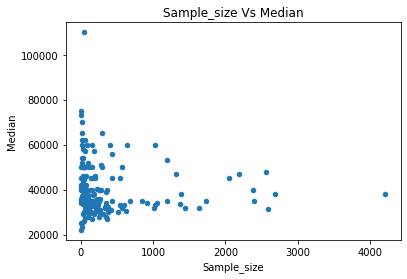

In [9]:
ax=recent_grads.plot(x="Sample_size",y="Median",kind="scatter")
ax.set_title("Sample_size Vs Median")


Text(0.5, 1.0, 'Sample_size Vs. Unemployment_rate')

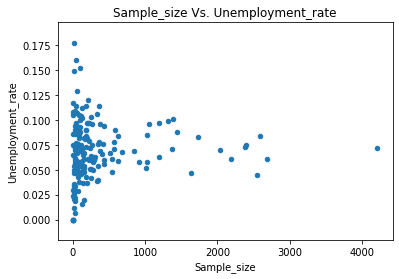

In [10]:
ax=recent_grads.plot(x="Sample_size",y="Unemployment_rate",kind="scatter")
ax.set_title("Sample_size Vs. Unemployment_rate")

Text(0.5, 1.0, 'Full_time Vs. Median')

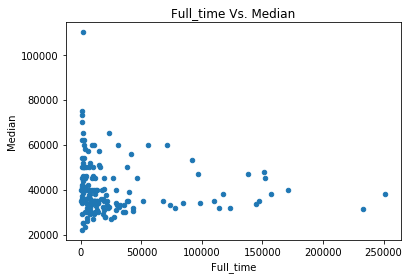

In [11]:
ax=recent_grads.plot(x="Full_time",y="Median",kind="scatter")
ax.set_title("Full_time Vs. Median")

Text(0.5, 1.0, 'ShareWomen Vs. Unemployment_rate')

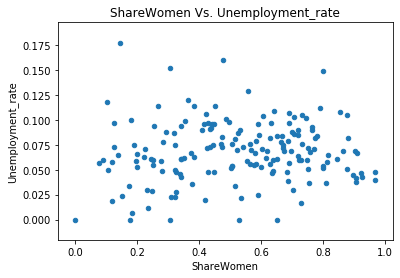

In [12]:
ax=recent_grads.plot(x="ShareWomen",y="Unemployment_rate",kind="scatter")
ax.set_title("ShareWomen Vs. Unemployment_rate")

Text(0.5, 1.0, 'Men Vs. Median')

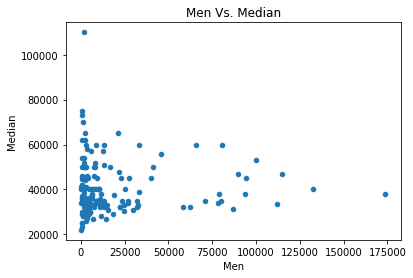

In [13]:
ax=recent_grads.plot(x="Men",y="Median",kind="scatter")
ax.set_title("Men Vs. Median")

Text(0.5, 1.0, 'Women Vs. Median')

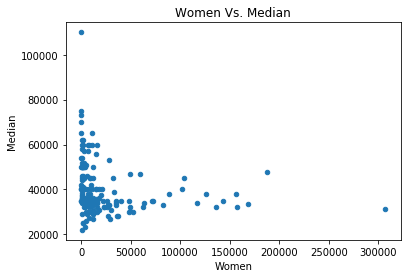

In [14]:
ax=recent_grads.plot(x="Women",y="Median",kind="scatter")
ax.set_title("Women Vs. Median")

### 2.Using scatterplots explore the following questions.
- Do students in more popular majors make more money?
- Do students that majored in subjects that were majority     female make more money?
- Is there any link between the number of full-time employees and median salary?

 1.Do students in more popular majors make more money?

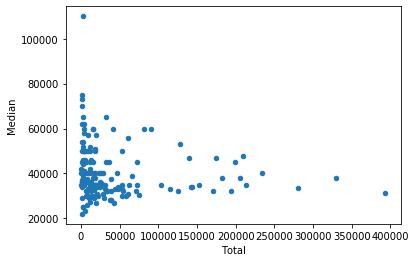

In [15]:
recent_grads.plot(x='Total', y='Median', kind='scatter')

The scatterplot does show a trend to the data and have significant outlier.When we explore the scatterplot we can see that for the same total no of major student (between 0-100000)the median seems to have different values.ie,the values in x axis are irrelevant to the values in y axis.So there is no corelation between total and Median .If the values are irrelevant, then there can't possibly be a correlation between Total  and Median.
No relationship between these two variables.
Therefore,doesnt seems like students with popular major make more money

2.Do students that majored in subjects that were majority female make more money?

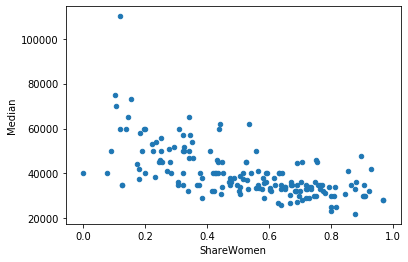

In [16]:
recent_grads.plot(x='ShareWomen', y='Median', kind='scatter')

This shows a moderately strong negative linear association.So its definite that female students doesn't make more money than men.

3.Is there any link between the number of full-time employees and median salary?

Text(0.5, 1.0, 'Full_time Vs. Median')

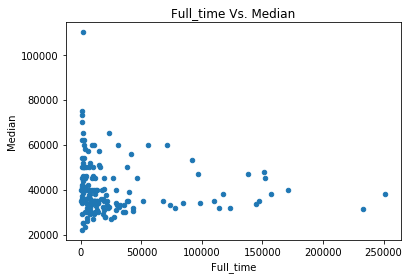

In [17]:
ax=recent_grads.plot(x="Full_time",y="Median",kind="scatter")
ax.set_title("Full_time Vs. Median")

There is a definite trend in data.But for the x axis values (Full-time employees),the y-axis values(median salary) seems to be irrelevant.(for around same x values there are difeerent y values ).So there can't be possible relationship between full time employees and median salary

## Part3 
### 1.Generating Histograms


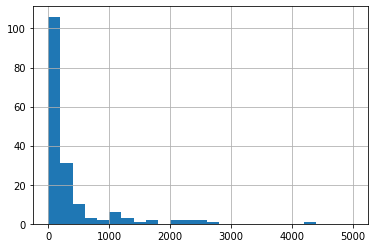

In [18]:
ax=recent_grads['Sample_size'].hist(bins=25,range=(0,5000))



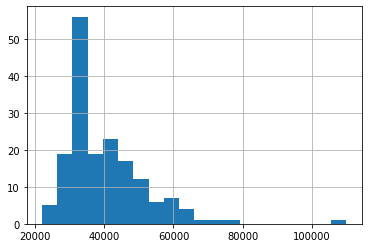

In [19]:
ax=recent_grads['Median'].hist(bins=20)



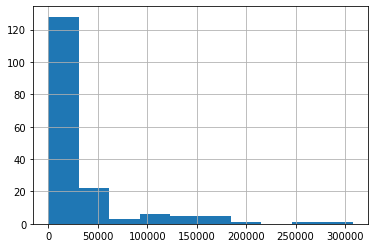

In [20]:
ax=recent_grads['Employed'].hist(bins=10)



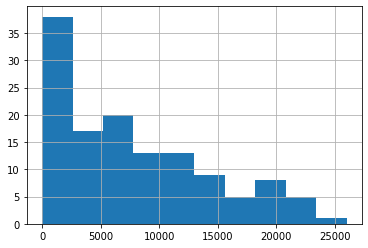

In [21]:
ax=recent_grads['Full_time'].hist(bins=10,range=(0,26000))



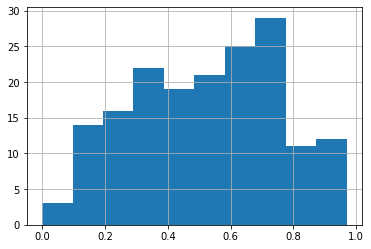

In [22]:
ax=recent_grads['ShareWomen'].hist(bins=10)



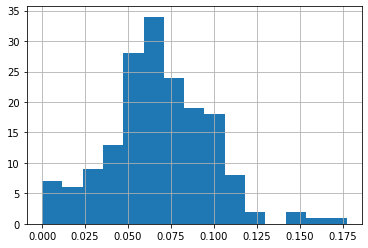

In [23]:
ax=recent_grads['Unemployment_rate'].hist(bins=15)



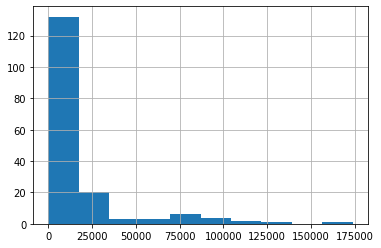

In [24]:
ax=recent_grads['Men'].hist(bins=10)



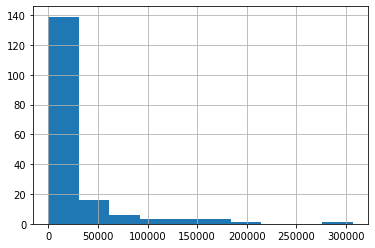

In [25]:
ax=recent_grads['Women'].hist(bins=10)



### 2. Explore the following questions:
- What percent of majors are predominantly male? Predominantly female?
- What's the most common median salary range?


### 1.What percent of majors are predominantly male? Predominantly female?

We can plot the histogram for ShareWomen once again with 2 bins.


(60, 100)

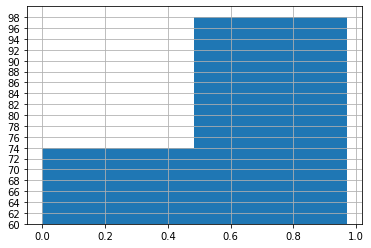

In [26]:

ax=recent_grads['ShareWomen'].hist(bins=2)
ax.set_yticks(np.arange(60,100,step=2))
ax.set_ylim(60,100)


From exploring the histogram,we will consider the part which is greater than 0.5 (>50 %) which is predominantly female.From the graph we can see that there are 98 majors which has predominantly female students.ie, 98 out of 172 majors are female dominant.

Considering the part which is less than 0.5,there are 74 majors which are men dominant.(ie,majors where there are < 50% of female students )ie,74 out of 172 majors.

 Around 57% of majors are predominantly female and around 43% of majors are predominatly men.


### 2.What's the most common median salary range?

We can plot the histogram for Median again.


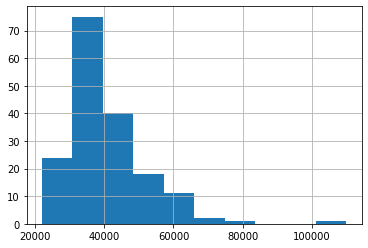

In [27]:
ax=recent_grads['Median'].hist(bins=10)




From observing the plot we can see that the highest frequency count or most of the people's salary fall within the range 30000 - 40000. 
So the most common Median salary range is between 30000 and 40000.

## Part 3: Scatter Matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F0E8CE8248>,
      dtype=object)

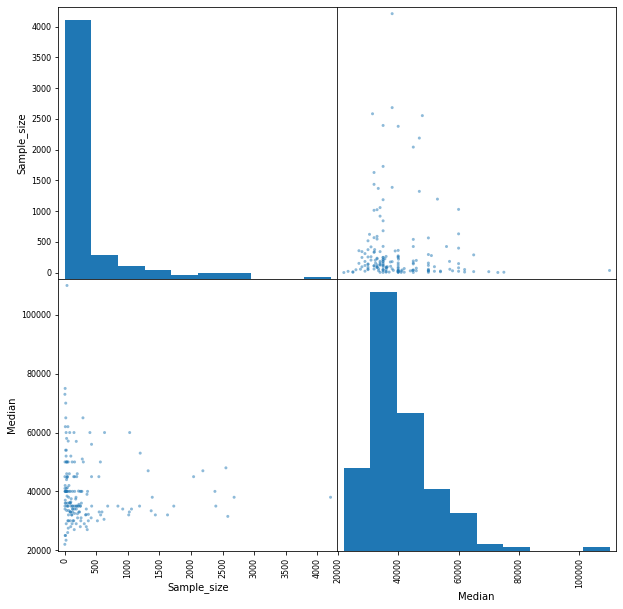

In [28]:
from pandas.plotting import scatter_matrix
# create 2 by 2 scatter matrix plot using Sample_size and Median
scatter_matrix(recent_grads[['Sample_size','Median']],figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F0E8EB9048>,
      dtype=object)

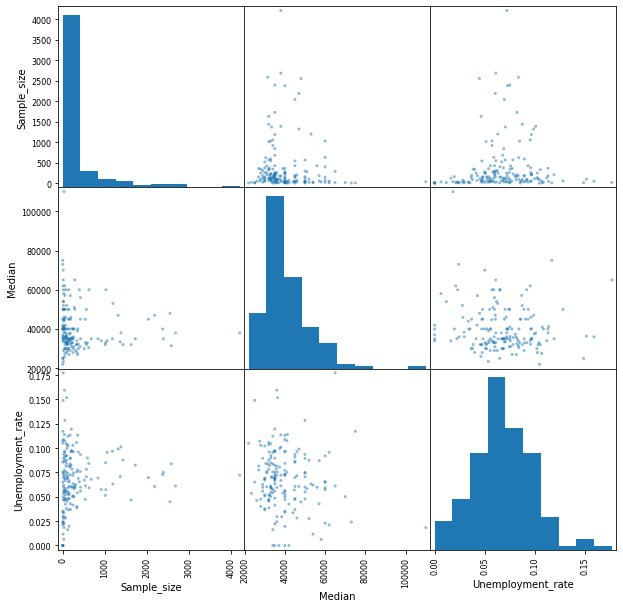

In [29]:
#Create a 3 by 3 scatter matrix plot 
#using the Sample_size, Median, and Unemployment_rate columns.
scatter_matrix(recent_grads[['Sample_size','Median','Unemployment_rate']],figsize=(10,10))

From the above scatter matrix,we can see that the common median salary range  between 30000 -40000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F0E8EAB4C8>,
      dtype=object)

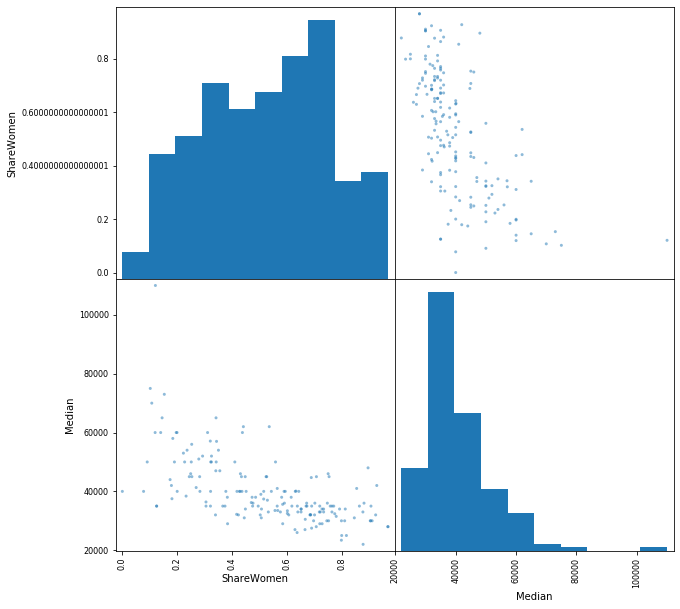

In [30]:
scatter_matrix(recent_grads[['ShareWomen','Median']],figsize=(10,10))

The students that majored in subjects that were majority female doesnt make more money. when we look at the plot ,there is a moderatly strong linear  relationship .As the percentage of women student increases the median salary range decreases.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F0E8C96CC8>,
      dtype=object)

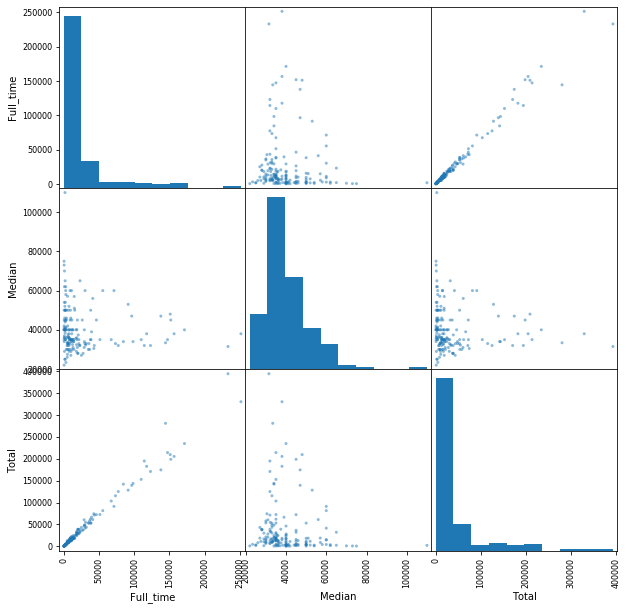

In [31]:
scatter_matrix(recent_grads[['Full_time','Median','Total']],figsize=(10,10))

Exploring full_time and median,it doesnt seem like full_Time employees make more money.
Also there is no relationship seen beween Total and Median,ie,students with popular major doesnt make more money

## Part-5 Bar plots

Text(0.5, 1.0, 'Percentage of women in last 10 Majors')

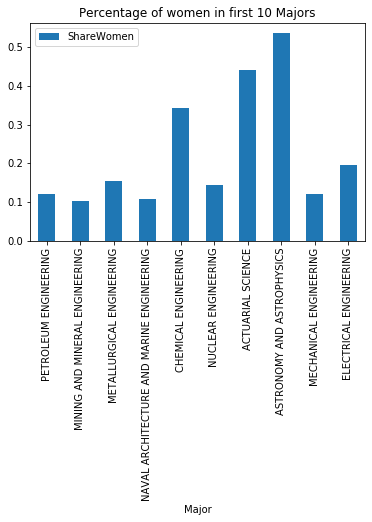

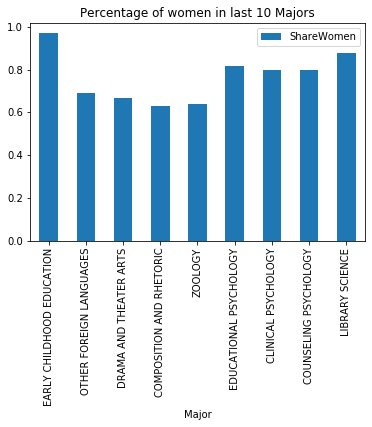

In [32]:
#Use bar plots to compare the percentages of women (ShareWomen) 
#from the first ten rows and last ten rows of the recent_grads dataframe.

recent_grads[:10].plot.bar(x='Major',y='ShareWomen').set_title('Percentage of women in first 10 Majors')
recent_grads[163:].plot.bar(x='Major',y='ShareWomen').set_title('Percentage of women in last 10 Majors')

Text(0.5, 1.0, 'Unemployment rate for last 10 Majors')

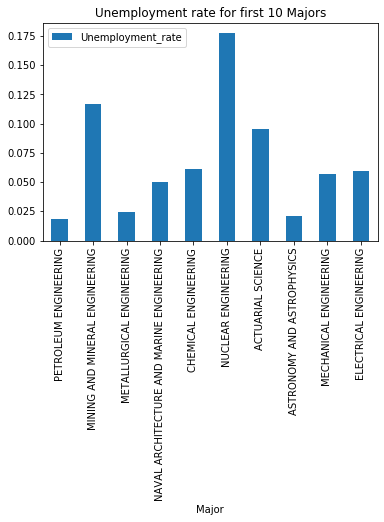

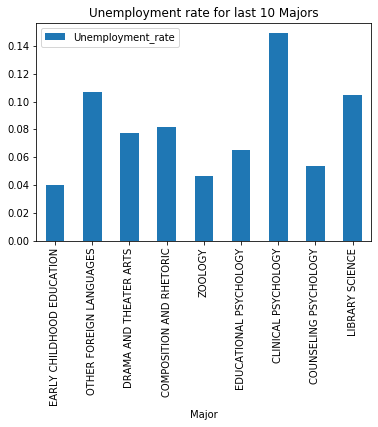

In [33]:
#Use bar plots to compare the unemployment rate (Unemployment_rate) from 
#the first ten rows and last ten rows of the recent_grads dataframe.

recent_grads[:10].plot.bar(x='Major',y='Unemployment_rate').set_title('Unemployment rate for first 10 Majors')
recent_grads[163:].plot.bar(x='Major',y='Unemployment_rate').set_title('Unemployment rate for last 10 Majors')

## Part-6
### 1.Grouped Bar plot

In [35]:
grouped=recent_grads.groupby('Major_category').agg({'Men':"sum",
                                           'Women':"sum",
                                             })
grouped['Total']=grouped['Men']+grouped["Women"]
grouped

,Men,Women,Total
Major_category,,,
Agriculture & Natural Resources,40357.0,35263.0,75620.0
Arts,134390.0,222740.0,357130.0
Biology & Life Science,184919.0,268943.0,453862.0
Business,667852.0,634524.0,1302376.0
Communications & Journalism,131921.0,260680.0,392601.0
Computers & Mathematics,208725.0,90283.0,299008.0
Education,103526.0,455603.0,559129.0
Engineering,408307.0,129276.0,537583.0
Health,75517.0,387713.0,463230.0


In [36]:
grouped['Total'].max()

1302376.0

Text(5, 1302378, 'Most number of students \n is in Business category')

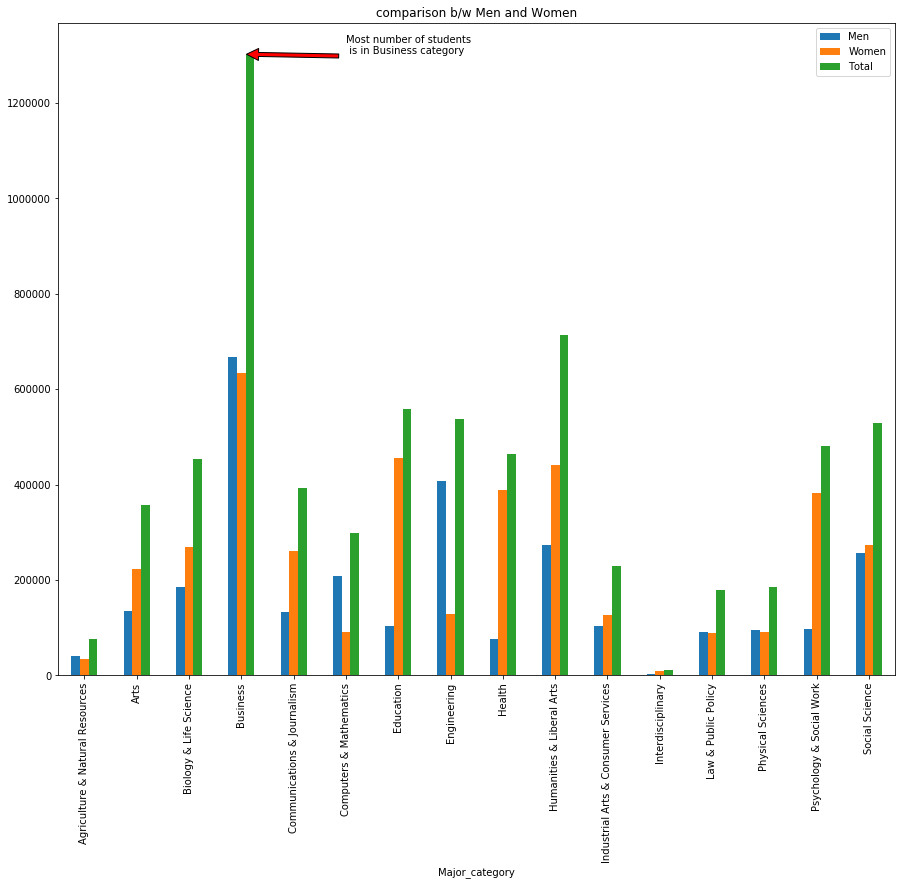

In [38]:

fig, ax = plt.subplots(figsize = (15,12))

grouped.plot.bar(ax = ax).set_title('comparison b/w Men and Women')

ax.annotate('Most number of students \n is in Business category',xy=(3,1302376.0),xytext=(5,1302378),arrowprops = dict(facecolor='red',shrink=0.05))


Comparing the men and women students in major_category,it seen that in major categories such as Education,Health,Humanities&liberal Arts and psychology & Social Work women graduates are relatively higher than men graduates.
On the other hand,in Engineering and computers & Mathematics men graduates are more than women graduates.
Business category has the most number of graduates ie 1302376 students



### 2.Box plot

In [ ]:
#Use a box plot 
#to explore the distributions of median salaries and unemployment rate.

# Distribution of median salaries
recent_grads.boxplot('Median').set_title("Distribution of Median Salaries")

The bottom 25% of the salaries falls in the range somewhere near 22000-33000 . The top 25% of the salary falls in the range somewhere near 45000 - 62000. The median of the salary falls somewhere near 36000.

In [ ]:
#Distribution of Unemployment_rate
recent_grads.boxplot('Unemployment_rate').set_title("Distribution of Unemployment_rate")

The bottom 25% of unemployment_rate falls in the range 0-0.05.The top 25% falls in the range 0.9 -0.13.Median is somewhere near 0.07



### 3.Hexagonal Bin Plots

In [ ]:
#Use a hexagonal bin plot to visualize the
#columns that had dense scatter plots from earlier in the project.

#Sample_size vs Median
# Sample_size Vs Median

recent_grads.plot.hexbin('Sample_size','Median',gridsize=20).set_title("Sample_size Vs Median")

The median salary lies between 30000 and 40000.

In [ ]:
# Sample_size Vs Unemployment_rate
recent_grads.plot.hexbin('Sample_size','Unemployment_rate',gridsize=20).set_title("Sample_size Vs Unemployment_rate")

The unemployment rate lies between 0.06 and 0.75 ie,somewhere between 6 to 7.5%.

In [ ]:
#Full_time Vs Median
recent_grads.plot.hexbin('Full_time','Median',gridsize=20).set_title("Full_time Vs Median")

In [ ]:
# Men Vs Median
recent_grads.plot.hexbin('Men','Median',gridsize=20).set_title("Men Vs Median")

In [ ]:
#Women Vs Median
recent_grads.plot.hexbin('Women','Median',gridsize=20).set_title("Women Vs Median")

The median salary lies between 30000 and 40000.

In [ ]:
#ShareWomen Vs Unemployment_rate

recent_grads.plot.hexbin('ShareWomen','Unemployment_rate',gridsize=20).set_title("ShareWomen Vs Unemployment_rate")

## Conclusion
   

The major findings are:
- Students in popular major does not seems to make more earnings than the others.
- Female students usually have less income than the male students. We could also find tha around 57% of majors are predominantly female and around 43% of majors are predominatly men.
- Business majors have the most number of students compared to other majors.
- unemployment rate is bettween 6 - 7.5 %
- The Median salary lies between 30k and 40k. 